In [719]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 27 22:15:13 2022

@author: rodrigo
"""

#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import os
import sys  

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.positioning_sensors as ps
importlib.reload(ps)

import src.network_fitness as netfit
importlib.reload(netfit)

import src.manageExperiments as me
importlib.reload(me)

import config.config as cfg
importlib.reload(cfg)



from geneticalgorithm import geneticalgorithm as ga

import itertools as it

#read_global_variables

plt.style.use("ggplot")


fn = "linz_with_init_net_exp_2.txt"
setup = me.readConfigFile(fn)


#cargamos imagenes en luminance e importance
ilumina = setup["folder_input"] + setup["input_ntli"]
niveles = setup["folder_input"] + setup["input_evm"]
sigma_y = setup['filterg_sy']
sigma_x = setup['filterg_sx']
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
path2output_semivars = (cfg.experiment 
          + setup["experiment_id"]
          + setup["folder_semivariances"]
          + setup["output_semivariances"] 
                       )


filesv = path2output_semivars + ".csv"
filesvmask = path2output_semivars + "mask.csv"

path2optimum_values_file = (cfg.experiment 
                           + setup["experiment_id"] 
                           + setup["folder_output"] 
                           )

saveOptimumValuesTofile = (path2optimum_values_file
                           + setup["output_values"]
                          )

saveArgsTofile = (path2optimum_values_file
                  + setup["output_args"]
                 )

data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)
variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])


#NLTI: luminance
#luminance = ps.readIMG(cfg.data + ilumina)

ilumina = cfg.data + setup["folder_input"] + setup["input_ntli"]
niveles = cfg.data + setup["folder_input"] + setup["input_evm"]

#NTLI: luminance
NTLI = ps.readIMG(ilumina)

from PIL import Image

**Leyendo archivo de configuración del experimento**

In [720]:
fn = "linz_with_init_net_exp_2.txt"

**This function creates the following experiment structure where the semivariance maps and results are saved**
```
linz_experiment_with_initial_positions_no2/
├── linz_with_init_net_exp_2.txt
├── results
└── semivariances
    ├── semivariance050512022.csv
    └── semivariance050512022mask.csv
```

In [721]:
setup = me.readConfigFile(fn)
for key in iter(setup):
    print(str(key)+":" ,setup[str(key)])

experiment_id: linz_experiment_with_initial_positions_no2/
folder_input: locations/linz/
folder_semivariances: semivariances/
folder_output: results/
input_ntli: world_atlas_linzn
input_evm: linz_prioridades
output_semivariances: semivariance050512022
output_values: optimum_values.csv
output_args: optimum_arguments.csv
desaturation_th: -1
neglect_values: -1
tolerance_distance: 0.5
tolerance_angle: 15
filterg_sx: 0.5
filterg_sy: 0.5
gaussian_mode: constant
init_fixed_net: [[39, 22], [35, 29], [34, 31], [34, 34], [36, 39]]
nsensors: [0, 1, 2, 3, 4, 5]
sensitivity_c: [1, 10, 20, 30, 40]
flatness_means_decrease: True
ga_params: {'max_num_iteration': 100, 'population_size': 2000, 'mutation_probability': 0.1, 'elit_ratio': 0.1, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': 500}


In [722]:
#cargamos imagenes en luminance e importance

img1 = cfg.data + setup["folder_input"] + setup["input_ntli"]
img2 = cfg.data + setup["folder_input"] + setup["input_evm"]

NTLI = np.array(Image.open(img1))
FDNTLI = sp.ndimage.gaussian_filter(NTLI, sigma, mode = setup['gaussian_mode'])

EAM = ps.readIMG(img2, invert = True)

c = 1

In [723]:
data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)

variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])

variograms = variogram_set.reshape(len(variogram_set),NTLI.shape[0],NTLI.shape[1])
variograms_m = variogram_set_m.reshape(len(variogram_set),NTLI.shape[0],NTLI.shape[1])

EAM = EAM/np.max(EAM)

In [724]:
coords = ps.get_coords(EAM==1)

allc = setup["sensitivity_c"]

alls = setup["nsensors"]

n_sensors = len(setup['init_fixed_net'])
network = setup['init_fixed_net']

network = np.array(network).flatten()

```
        ub = np.max(FDNTLI)**2/2
            ix = self.validate_coordinates(p[0], p[1])
            
            if len(ix)>0:
                
                tvar = self.local_variograms[ix][0]
                tvar_m = self.local_variograms_m[ix][0]
                outofrange = (tvar_m==0)*ub
                inrange = (tvar_m==1)*tvar
                M = inrange + outofrange
                map0to1 = ((ub - M)/(ub))
                map0to1 = map0to1*(map0to1>0.9)
```

In [728]:
p = [39, 22]
FDNTLI2 = FDNTLI
ub = np.max(FDNTLI2)**2/2
ix = aptitude. validate_coordinates(p[0], p[1])
tvar = aptitude.local_variograms[ix][0]
tvar_m = aptitude.local_variograms_m[ix][0]
outofrange = (tvar_m==0)*ub
inrange = (tvar_m==1)*tvar
M = inrange + outofrange
map0to1 = ((ub - M)/(ub))

In [729]:
print(np.max(map0to1))
print(np.min(map0to1))

1.0
0.0


In [730]:
print(np.max(tvar))
print(np.min(tvar))
print(ub)

3.675488268699605
0.0
11.221063993900316


Text(0.5, 1.0, '0.9972205689714537')

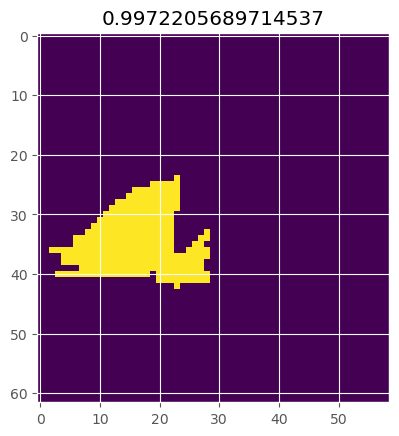

In [731]:
plt.imshow(map0to1>0.99)
plt.title(map0to1[p[0]+0, p[1]-6])

In [732]:
#r = 1
algorithm_parameters = setup["ga_params"]
algorithm_parameters["population_size"] = 4000
algorithm_parameters["max_num_iteration"] = 500
algorithm_parameters["max_iteration_without_improv"] = 50

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
 The best solution found:                                                                           
 [10. 26. 16. 41.  2.  9. 46.  5. 55. 40.]

 Objective function:
 -0.9554144954049225


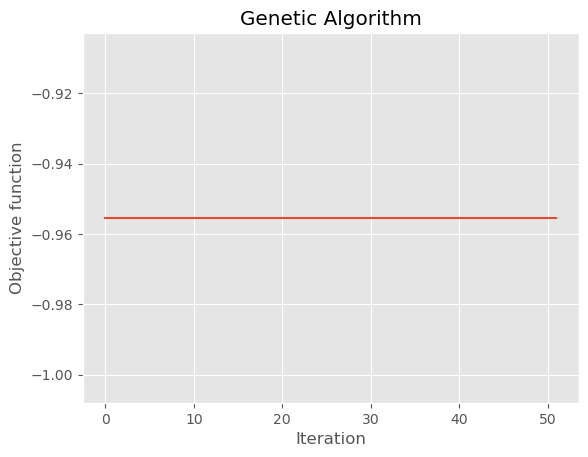


 'xor','max' or 'cover'
 The best solution found:                                                                           
 [28. 40. 36. 36. 19. 30. 35. 38. 48. 29.]

 Objective function:
 -0.9963103842296189


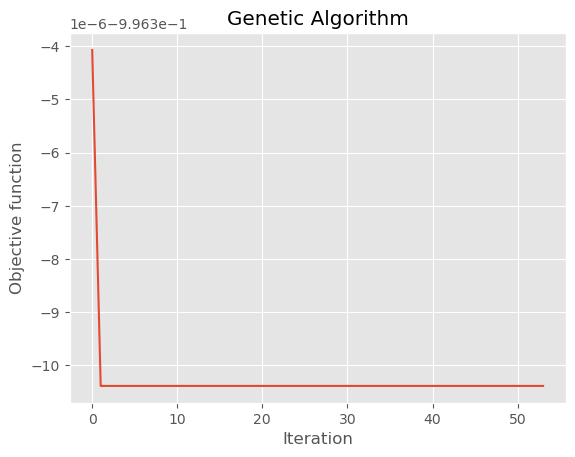


 'xor','max' or 'cover'
||||______________________________________________ 8.4% GA is running...

In [ ]:
import src.network_fitness as netfit
importlib.reload(netfit)

#esta variable no se usa
sensitivity = ps.f5(FDNTLI, EAM, 1)



varbound = np.array([[0, NTLI.shape[0]], [0, NTLI.shape[1]]]*n_sensors)

R =list([])
aptitudes = list([])
for r in range(0,6):
    aptitude = netfit.NetworkFitness(FDNTLI**3,
                                     EAM,
                                     sensitivity,
                                     variograms,
                                     variograms_m,
                                     coords,
                                     network,
                                     r)




    model = ga(function = aptitude.J,
                 dimension = len(varbound),
                 algorithm_parameters = algorithm_parameters,
                 variable_type = 'int',
                 variable_boundaries = varbound,
                 convergence_curve = True)



    model.run()
    P = model.output_dict["variable"]
    aptitude.J(P)
    Pbestcomb = aptitude.bestComb 
    R.append(Pbestcomb)
    aptitudes.append(model.output_dict["function"])

In [ ]:
print(model.output_dict["variable"])
aptitude.J(model.output_dict["variable"])


In [674]:
aptitude.bestComb

array([19,  8, 36, 33, 60, 18, 36, 37, 42, 57])

In [675]:
X = model.output_dict["variable"]
P = X.reshape(-1, 2).astype(int)
P

array([[19,  8],
       [36, 33],
       [60, 18],
       [36, 37],
       [42, 57]])

In [676]:
# [[39, 22],[35, 29], [34, 31], [34, 34], [36, 39]],

In [677]:
aptitude.J(P.flatten())
aptitude.bestComb.reshape(-1, 2)

array([[19,  8],
       [36, 33],
       [60, 18],
       [36, 37],
       [42, 57]])

/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_29889/1281347999.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(-np.array(aptitudes)*100, palette="tab10", linewidth=1.5, marker="o")


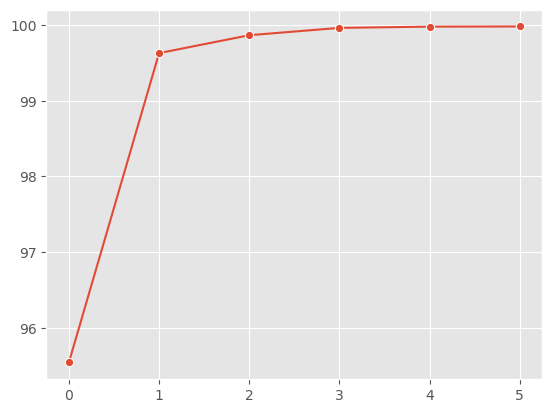

In [685]:
sns.lineplot(-np.array(aptitudes)*100, palette="tab10", linewidth=1.5, marker="o")
plt.show()

In [679]:
aptitude.J(aptitude.bestComb)

-0.9998320816177033

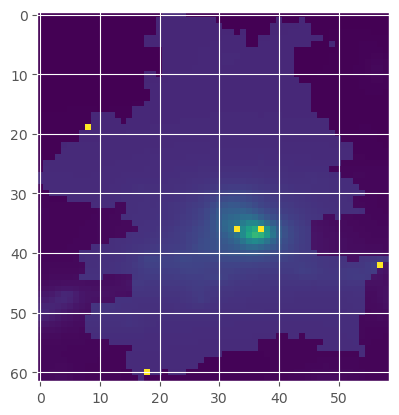

In [680]:
positions = (model.output_dict["variable"].reshape(-1,2)).astype(int)
MAP = (A)+EAM+NTLI
MAP[positions[:, 0], positions[:, 1]] = np.max(MAP)*1.5
plt.imshow(MAP)

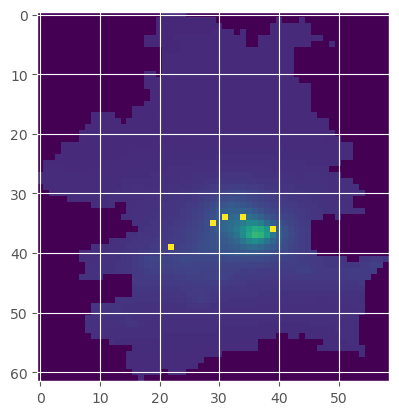

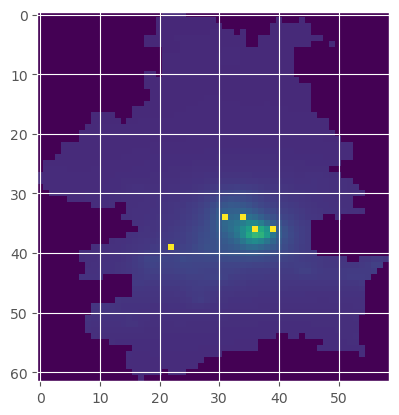

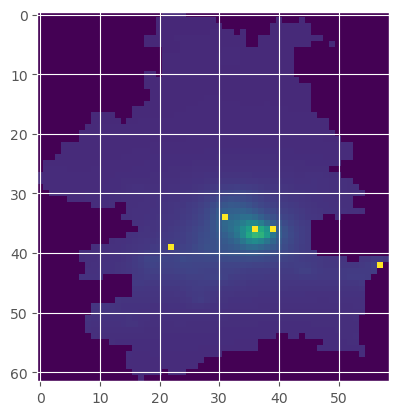

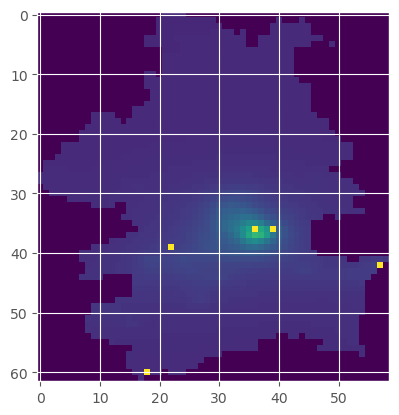

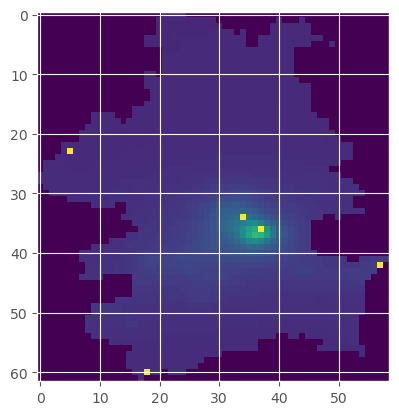

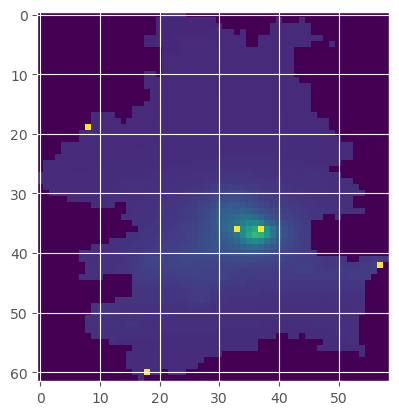

In [681]:


#fig, axs = plt.subplots(2, 3, figsize=(15, 15))


for i ,p in enumerate(R):
    

    #q_p = np.array([np.random.randint(ub[1]) for ub in varbound])
    A = np.zeros(NTLI.shape)

    #positions = network.reshape(-1, 2)
    #A[positions[:, 0], positions[:, 1]] = 1

    positions = p.reshape(-1, 2)
    
    MAP = (A)+EAM+NTLI
    
    MAP[positions[:, 0], positions[:, 1]] = np.max(MAP)*1.5

    #plt.imshow(MAP)
    
    #axs[int(i/3), i%3 ].grid(False)
    #axs[int(i/3), i%3 ].axis("off")
    #axs[int(i/3), i%3 ].imshow(MAP)
    #axs[int(i/3), i%3 ].title.set_text($$i$$)
    plt.grid(True)
    plt.axis("on")
    
    outside = (EAM==0)
    MAP[outside] = 0
    plt.imshow(MAP)

    plt.savefig("positions_"+str(i)+".png")
    plt.show()

In [682]:
n = 5
r = 5
K = list(it.combinations(np.arange(n), r))
K

[(0, 1, 2, 3, 4)]

In [718]:
import seaborn_image as isns

ModuleNotFoundError: No module named 'seaborn_image'

In [716]:
C = aptitude.getCapturedLightPollutionCovers(R[5].reshape(-1,2))
sns.imshow(MAP)

AttributeError: module 'seaborn' has no attribute 'imshow'

/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_29889/1365970209.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, palette="tab10", linewidth=2.5)


<Axes: >

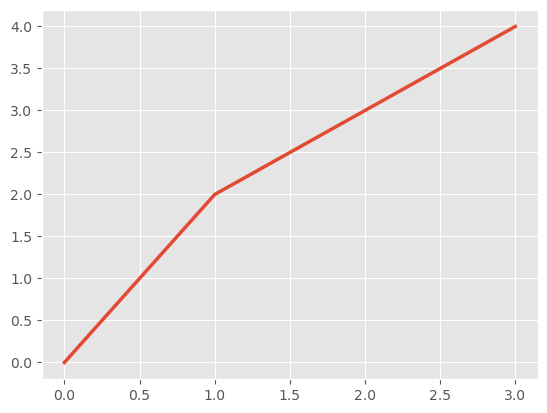

In [684]:
import seaborn as sns
data = [0, 2, 3, 4]
sns.lineplot(data, palette="tab10", linewidth=2.5)

In [498]:
C = (np.argmax(aptitude.getCapturedLightPollutionCovers(R[-1].reshape(-1,2)), axis = 0))



In [499]:
covers =  aptitude.getCapturedLightPollutionCovers(R[-1].reshape(-1,2))[2]



In [500]:
ix = R[-1].reshape(-1,2)

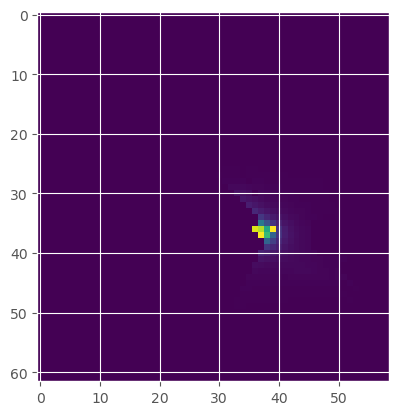

In [501]:
covers[tuple(ix[1])] = np.max(covers)

plt.imshow(covers)

In [502]:
np.max(covers)

20.641400672132228

In [503]:
p = R[-1].reshape(-1,2)
E = np.zeros(C.shape)

C[p[:, 0], p[:,1]] = 10

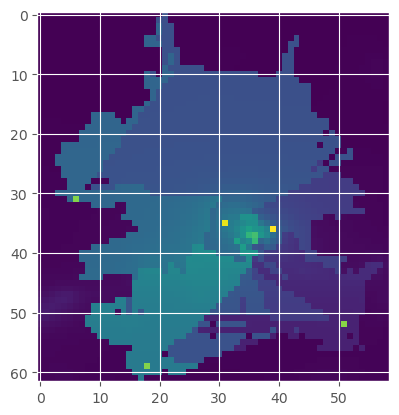

In [504]:
plt.imshow(C+E+FDNTLI)

In [505]:
p[:, 0]

array([52, 36, 35, 31, 59])

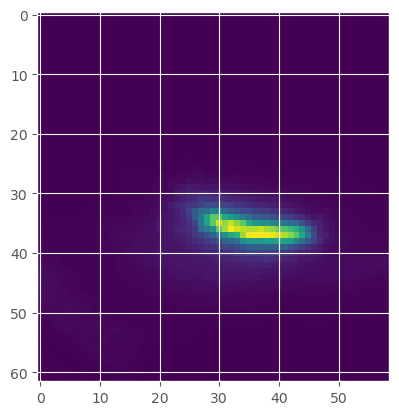

In [506]:
ix = 50

plt.imshow(variograms[ix])

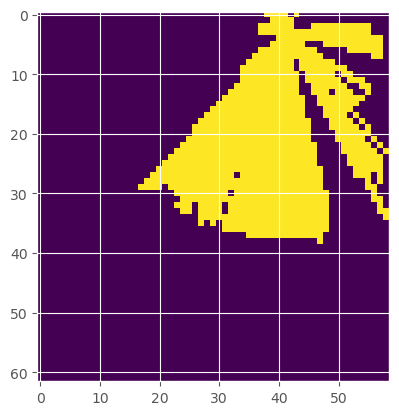

In [507]:


plt.imshow(variograms_m[ix])

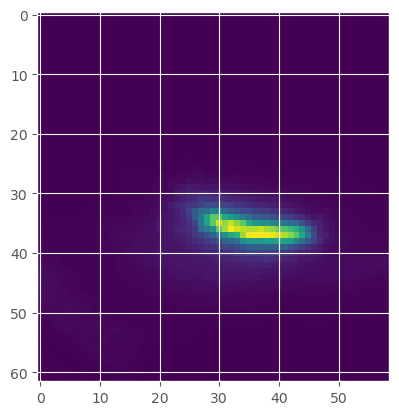

In [508]:
plt.imshow(variograms[ix])

In [509]:
print(np.max(variograms[ix]))
(np.min(variograms[ix]))

3.4066042293364194


0.0

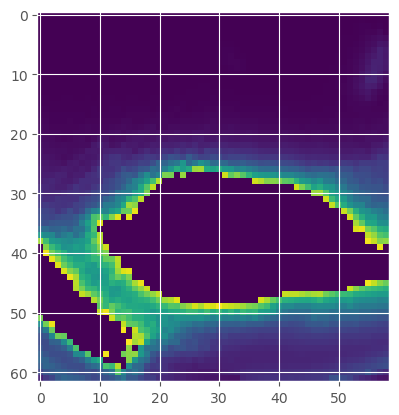

In [510]:
plt.imshow(variograms[ix] * (variograms[ix]>0) * (variograms[ix]<0.05)*1)